In [153]:
# Dependencies
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from pprint import pprint
import json
import time
from citipy import citipy
from Config import api_key
from datetime import datetime


In [154]:
# Open Weather URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

query = url + "appid=" + api_key
print(query)

# Lattitude and Longitue Range
lat_range = (-90, 90)
log_range = (-180, 180)

# Store cities
cities = []

# Store Lattitude and Longitude pairs
lat_lon = []

# Weather API response list
res_list = []


http://api.openweathermap.org/data/2.5/weather?appid=14d5e39479fa51ec048117a2e9d07195


In [155]:
# Select random Lattitude and Longitude
lattitudes = np.random.uniform(low=-90, high=90, size=1500)
longitudes = np.random.uniform(low=-180, high=180, size=1500)

lat_lon = zip(lattitudes, longitudes)


In [156]:
# Number of the Lattitude and Longitude pairs
#len(list(lat_lon))
#latlong = list(lat_lon)
#latlong


In [157]:
for latlon in lat_lon:
    latt, long = latlon
    city = citipy.nearest_city(latt, long).city_name
    
    if city not in cities:
        cities.append(city)
        
        

In [158]:
# Number of cities
len(cities)


595

In [159]:
# Store responses in a list
coord_lat = []
coord_lon = []
temperature = []
humidity = []
wind = []
clouds = []
city_name = []
cicountry = []
cidate = []

rec1=1
set1=0

print('Beginning Data Retrieval ')
print('--------------------------------------')

for cityname in cities:
    query_url = url + 'appid=' + api_key + '&q=' + cityname + '&units=imperial'
    res = requests.get(query_url)
    res_weather = res.json()

    # Set Counter to 1 and when Record counter exceeds 50, reset set counter to 1
    set1 = set1+1
    if set1 > 50:
        rec1 = rec1+1
        set1 = 1
    
    # Store the values to the list when the city is found.
    if res.status_code == 200:
        print(f'Processing Record {set1} of Set {rec1} | {cityname}')
        coord_lat.append(res_weather['coord']['lat'])
        coord_lon.append(res_weather['coord']['lon'])
        temperature.append(res_weather['main']['temp_max'])
        humidity.append(res_weather['main']['humidity'])
        wind.append(res_weather['wind']['speed'])
        clouds.append(res_weather['clouds']['all'])
        city_name.append(res_weather['name'])
        cicountry.append(res_weather['sys']['country'])
        cidate.append(res_weather['dt'])
            
    else:
        print(f'City not found. Skipping...')
        
    
    

Beginning Data Retrieval 
--------------------------------------
Processing Record 1 of Set 1 | minot
Processing Record 2 of Set 1 | tuatapere
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | roald
Processing Record 6 of Set 1 | hobart
City not found. Skipping...
Processing Record 8 of Set 1 | isangel
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | rodrigues alves
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | provideniya
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | hovd
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | pochutla
Processing Record 19 of Set 1 | vilhena
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | maragogi
Processing Record 22 of Set 1 | necochea
Processing Record 23 of Set 1 | gejiu
Processing Reco

In [160]:
# Create Dictionary of the weather lists
#print(f'Processing Record 1 of Set 1 | {cityname}')

weather_data = {'City Name':city_name,
                'Country':cicountry,
                'Date':cidate,
                'Lattitude':coord_lat,
                'Longitude':coord_lon,
                'Max Temperature (F)': temperature,
                'Humidity':humidity,
                'Wind Speed (MPH)': wind,
                'Cloudiness':clouds    
}

#print(len(city_name))
#print(len(cicountry))
#print(len(cidate))
#print(len(coord_lat))
#print(len(coord_lon))
#print(len(temperature))
#print(len(humidity))
#print(len(wind))
#print(len(clouds))
# Create DataFrame
weather_df = pd.DataFrame(weather_data)

weather_df.head()



,City Name,Country,Date,Lattitude,Longitude,Max Temperature (F),Humidity,Wind Speed (MPH),Cloudiness
0,Minot,US,1546480560,48.23,-101.30,35.06,69,13.87,1
1,Tuatapere,NZ,1546482572,-46.13,167.69,56.81,92,21.83,68
2,Rikitea,PF,1546482572,-23.12,-134.97,76.25,100,13.44,68
3,Ushuaia,AR,1546477200,-54.81,-68.31,42.80,81,11.41,90
4,Roald,NO,1546480200,62.58,6.12,41.00,93,20.80,92


In [161]:
# Calculate Max Date and convert into Date
max_date = weather_df['Date'].max()
print(max_date)
curr_date = datetime.fromtimestamp(max_date).strftime('%Y/%m/%d')

print(date)

# Export Data Frame to csv file.
weather_df.to_csv('./weather_api_call_500_cities.csv')

1546482900
2019/01/02


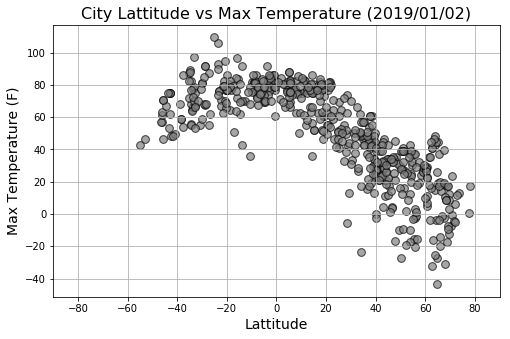

In [162]:
# Scatter Plot Lattitude Vs Maximum Temperature
plt.figure(figsize=(8,5))

plt.scatter(weather_df['Lattitude'],weather_df['Max Temperature (F)'],s=60,alpha=0.7,
            marker='o',color='grey',edgecolor='black',norm=2)

plt.title('City Lattitude vs Max Temperature (' + curr_date + ')',fontsize=16)
plt.xlabel('Lattitude', fontsize=14)
plt.xlim(-90,90)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.grid(True)

plt.savefig('Lat Vs MaxTemp.png')

plt.show()

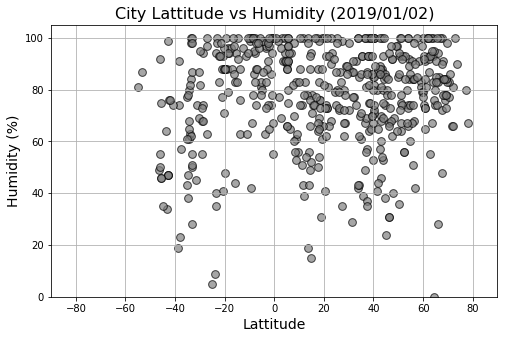

In [163]:
# Scatter Plot Lattitude Vs Humidity
plt.figure(figsize=(8,5))

plt.scatter(weather_df['Lattitude'],weather_df['Humidity'],s=60,alpha=0.7,
            marker='o',color='grey',edgecolor='black',norm=2)

plt.title('City Lattitude vs Humidity (' + curr_date + ')',fontsize=16)
plt.xlabel('Lattitude', fontsize=14)
plt.xlim(-90,90)
plt.ylabel('Humidity (%)', fontsize=14)
plt.ylim(0,105)
plt.grid(True)

plt.savefig('Lat Vs Humidity.png')

plt.show()


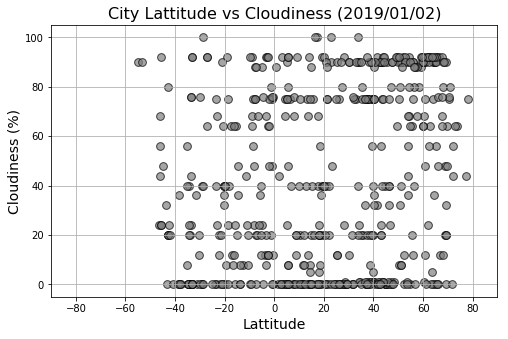

In [164]:
# Scatter Plot Lattitude Vs Cloudiness
plt.figure(figsize=(8,5))

plt.scatter(weather_df['Lattitude'],weather_df['Cloudiness'],s=60,alpha=0.7,
            marker='o',color='grey',edgecolor='black',norm=2)

plt.title('City Lattitude vs Cloudiness (' + curr_date + ')',fontsize=16)
plt.xlabel('Lattitude', fontsize=14)
plt.xlim(-90,90)
plt.ylabel('Cloudiness (%)', fontsize=14)
#plt.ylim(0,105)
plt.grid(True)

plt.savefig('Lat Vs Cloudiness.png')

plt.show()

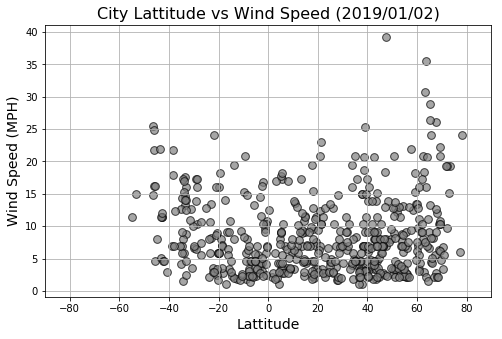

In [165]:
# Scatter Plot Lattitude Vs WindSpeed
plt.figure(figsize=(8,5))

plt.scatter(weather_df['Lattitude'],weather_df['Wind Speed (MPH)'],s=60,alpha=0.7,
            marker='o',color='grey',edgecolor='black',norm=2)

plt.title('City Lattitude vs Wind Speed (' + curr_date + ')',fontsize=16)
plt.xlabel('Lattitude', fontsize=14)
plt.xlim(-90,90)
plt.ylabel('Wind Speed (MPH)', fontsize=14)
#plt.ylim(0,105)
plt.grid(True)

plt.savefig('Lat Vs Wind Speed.png')

plt.show()